# Phun with Phish Data

This notebook will use the ArcPy charts API to explore the characteristics of a dataset related to performances by the band Phish

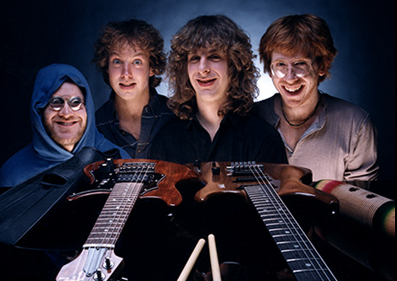

### Why use a notebook?
1. Notebook cells can contain a variety of formats besides code—including text descriptions and graphics
2. Code results (including graphics) are embedded in an output cell and can be viewed directly in the notebook
3. Notebooks can be easily shared in a variety of formats—and cached outputs can be included—this means the results of your analysis or exploration can be easily conveyed to others
4. Individual notebook cells can be tweaked and re-run without the need to re-run the entire script—this suits the often exploratory and iterative nature of data science

### Setup 

Grab the layer we want to create charts from

In [ ]:
import arcpy
the_map = arcpy.mp.ArcGISProject('current').activeMap
shows_lyr = the_map.listLayers('phish_shows')[0]

What fields does our layer have?

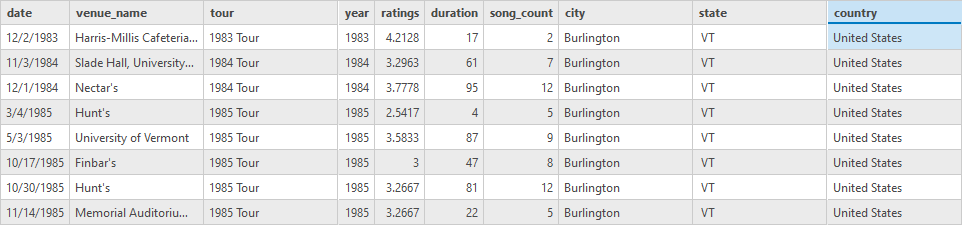

### Visualize Categories

Create a bar chart showing the total number of performances per state

In [77]:
bar = arcpy.charts.Bar(x='state', aggregation='count',
                       title="Count of shows by state",
                       dataSource=shows_lyr)

Display the chart in a notebook

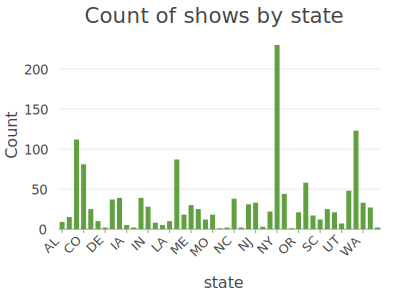

In [78]:
bar

Change the size so we can see it better (including all the state labels)

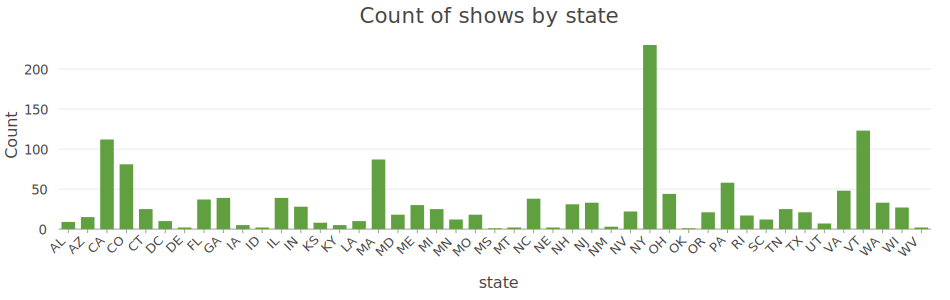

In [79]:
bar.displaySize = (950, 300) 
bar

Sort by y-axis so that it's easier to interpret

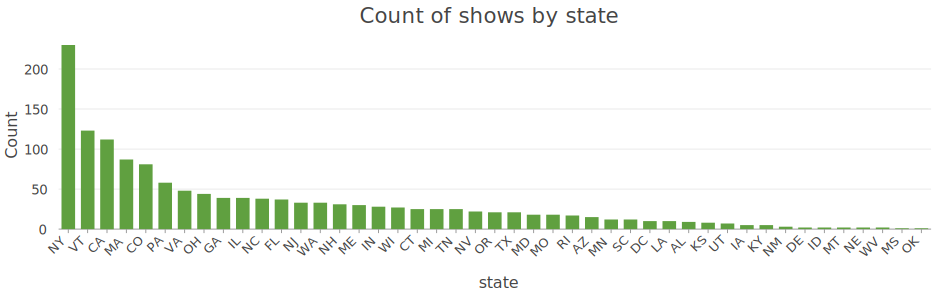

In [80]:
bar.yAxis.sort = 'DESC'
bar

### Visualize Distributions

Create a histogram to explore the distribution of show duration

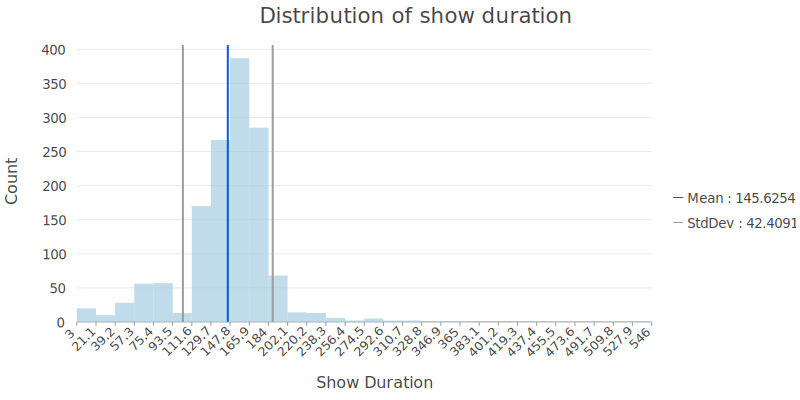

In [82]:
histogram = arcpy.charts.Histogram(x='duration', binCount=30, showMean=True, 
                                   showStandardDeviation=True,
                                   title="Distribution of show duration",
                                   xTitle="Show Duration",
                                   displaySize=(800, 400), dataSource=shows_lyr)
histogram

Create box plot of show duration broken down state so that we can compare the distribution of duration between states

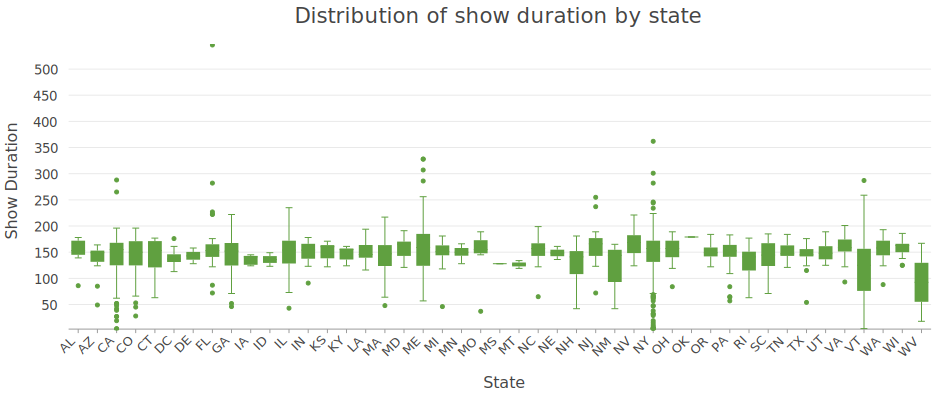

In [83]:
box = arcpy.charts.Box(y='duration', x='state', showOutliers=True,
                       title="Distribution of show duration by state", 
                       xTitle="State", yTitle="Show Duration",
                       displaySize=(950, 400), dataSource=shows_lyr)
box

### Visualize Time

Create a calendar heat chart to show the aggregated month and day of month patterns

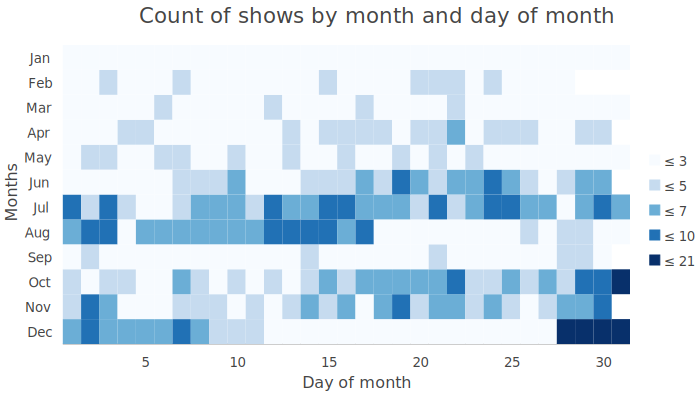

In [84]:
chc = arcpy.charts.CalendarHeat(dateField='date', calendarType='YEAR_MONTHSDAYS',
                                title="Count of shows by month and day of month",
                                displaySize=(700, 400), dataSource=shows_lyr)
chc

Create a line chart to show the linear trend in the number of shows occurring over time

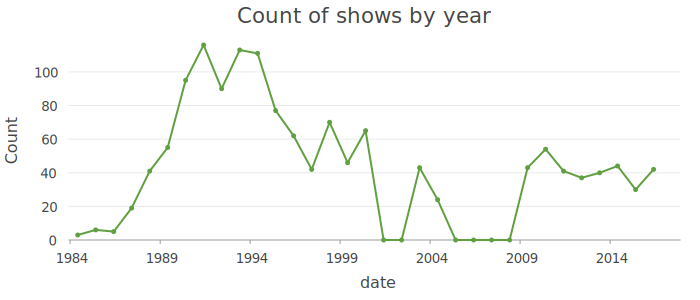

In [85]:
line = arcpy.charts.Line(x='date', aggregation='count', 
                         title="Count of shows by year",
                         displaySize=(700, 300), dataSource=shows_lyr)
line

Create the same line chart but do a mean aggregation on the duration field to show the average show duration by year

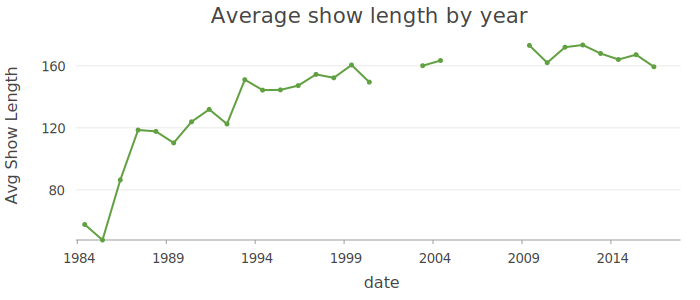

In [86]:
line = arcpy.charts.Line(x='date', y='duration', 
                  aggregation='mean', nullPolicy='null',
                  title="Average show length by year", yTitle="Avg Show Length",
                  displaySize=(700, 300), dataSource=shows_lyr)
line

### Save a chart to a graphics file or add to layer

Save the chart as a separate file so that it can be used independent of the notebook (eg in a whitepaper or research publication)

In [87]:
line.exportToSVG('line_chart.svg')

Add to layer in Table of Contents

In [88]:
line.addToLayer(shows_lyr)